In [ ]:
# PLOTTING STUFF
# Authors: Jessica Alexander, Lavanya M K, Juan Pablo Botero, Kurt Lehner, Brenda Liu
# Last Updated: 2022-07-28

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# get list of files available
path = "/Users/jessraissouni/github/motorImagery/processed_data"
filelist = os.listdir(path)

for x, file in enumerate(filelist):
    print(x, file)

0 hand_Epochs_Img_gamma1.npy
1 hand_Epochs_Img_gamma2.npy
2 hand_Epochs_Overt_beta2.npy
3 hand_Epochs_Img_beta1.npy
4 Tng_Epochs_Img_gamma1.npy
5 Tng_Epochs_Overt_gamma1.npy
6 hand_Epochs_Overt_beta3.npy
7 hand_Epochs_Overt_beta1.npy
8 hand_Epochs_Img_beta2.npy
9 Tng_Epochs_Img_gamma2.npy
10 Tng_Epochs_Overt_gamma2.npy
11 hand_Epochs_Img_beta3.npy
12 hand_Epochs_Overt_gammaH.npy
13 hand_Epochs_Overt_gamma1.npy
14 hand_Epochs_Overt_gamma2.npy
15 Tng_Epochs_Img_gammaH.npy
16 Tng_Epochs_Overt_gammaH.npy
17 hand_Epochs_Img_gammaH.npy
18 Tng_Epochs_Img_beta3.npy
19 Tng_Epochs_Overt_beta1.npy
20 Tng_Epochs_Img_beta2.npy
21 Tng_Epochs_Overt_beta2.npy
22 Tng_Epochs_Overt_beta3.npy
23 Tng_Epochs_Img_beta1.npy


In [3]:
# organize specific files for plotting (load data, select channels, average across epochs)
#returns all epoch timepoints averaged across trials
def fileprep(fileidx, chans, path):
    dat = np.load(path + '/' + filelist[fileidx])
    dat_chans = dat[:,chans,:]
    dat_chans_avg = np.mean(dat_chans, axis=0)
    
    return dat_chans_avg

#returns all individual trials, averaged across epoch timepoints
def fileprep2(fileidx, chans, path):
    dat = np.load(path + '/' + filelist[fileidx])
    dat_chans = dat[:,chans,:]
    dat_trial_pre = np.mean(dat_chans[:, 0:999], axis=1)
    dat_trial_post = np.mean(dat_chans[:, 1250:], axis=1)
    
    return dat_trial_pre, dat_trial_post

#prep data for plots below
s1_hand27_beta1_overt = fileprep(7, 27, path)
s1_hand27_gammaH_overt = fileprep(12, 27, path)
s1_hand27_beta1_imag = fileprep(3, 27, path)
s1_hand27_gammaH_imag = fileprep(17, 27, path)

s1_hand35_beta1_overt = fileprep(7, 35, path)
s1_hand35_gammaH_overt = fileprep(12, 35, path)
s1_hand35_beta1_imag = fileprep(3, 35, path)
s1_hand35_gammaH_imag = fileprep(17, 35, path)

s1_hand27_beta1_overt_powerpre, s1_hand27_beta1_overt_powerpost = fileprep2(7, 27, path)
s1_hand27_beta1_imag_powerpre, s1_hand27_beta1_imag_powerpost = fileprep2(3, 27, path)

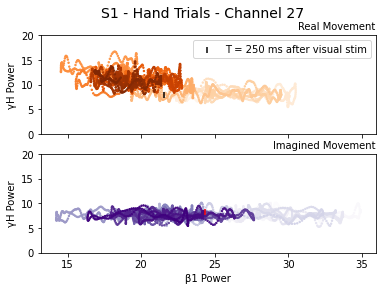

In [4]:
# plot beta1 v gammaH for both real and imagined conditions for S1+Hand+Electrode 27
oranges = plt.cm.get_cmap('Oranges', 256)
z = oranges(np.linspace(0,1,4001))
purples = plt.cm.get_cmap('Purples', 256)
w = purples(np.linspace(0,1,4001))

fig, axs = plt.subplots(2, 1, sharex='col')

axs[0].scatter(s1_hand27_beta1_overt, s1_hand27_gammaH_overt, c=z, s=2)
axs[1].scatter(s1_hand27_beta1_imag, s1_hand27_gammaH_imag, c=w, s=2)
markerovert = axs[0].scatter(s1_hand27_beta1_overt[1250], s1_hand27_gammaH_overt[1250], c='black', marker='|')
markerimag = axs[1].scatter(s1_hand27_beta1_imag[1250], s1_hand27_gammaH_imag[1250], c='red', marker='|')
axs[0].set_ylim(0, 20)
axs[1].set_ylim(0, 20)

fig.suptitle("S1 - Hand Trials - Channel 27", fontsize=14)
axs[0].set_title("Real Movement", fontsize=10, loc='right')
axs[1].set_title("Imagined Movement", fontsize=10, loc='right')

axs[1].set_xlabel(str(chr(946)+'1 Power'))
axs[0].set_ylabel(str(chr(947)+'H Power'))
axs[1].set_ylabel(str(chr(947)+'H Power'))

axs[0].legend([markerovert], ['T = 250 ms after visual stim'], loc='upper right')

plt.show()
fig.savefig("BetavGamma_S1Hand27.png")

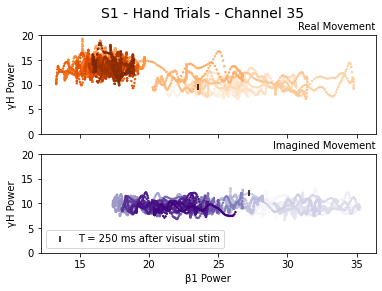

In [5]:
# plot beta1 v gammaH for both real and imagined conditions for S1+Hand+Electrode 35
oranges = plt.cm.get_cmap('Oranges', 256)
z = oranges(np.linspace(0,1,4001))
purples = plt.cm.get_cmap('Purples', 256)
w = purples(np.linspace(0,1,4001))

fig, axs = plt.subplots(2, 1, sharex='col')

axs[0].scatter(s1_hand35_beta1_overt, s1_hand35_gammaH_overt, c=z, s=2)
axs[1].scatter(s1_hand35_beta1_imag, s1_hand35_gammaH_imag, c=w, s=2)
markerovert = axs[0].scatter(s1_hand35_beta1_overt[1250], s1_hand35_gammaH_overt[1250], c='black', marker='|')
markerimag = axs[1].scatter(s1_hand35_beta1_imag[1250], s1_hand35_gammaH_imag[1250], c='black', marker='|')
axs[0].set_ylim(0, 20)
axs[1].set_ylim(0, 20)

fig.suptitle("S1 - Hand Trials - Channel 35", fontsize=14)
axs[0].set_title("Real Movement", fontsize=10, loc='right')
axs[1].set_title("Imagined Movement", fontsize=10, loc='right')

axs[1].set_xlabel(str(chr(946)+'1 Power'))
axs[0].set_ylabel(str(chr(947)+'H Power'))
axs[1].set_ylabel(str(chr(947)+'H Power'))

axs[1].legend([markerovert], ['T = 250 ms after visual stim'], loc='lower left')

plt.show()
fig.savefig("BetavGamma_S1Hand35.png")

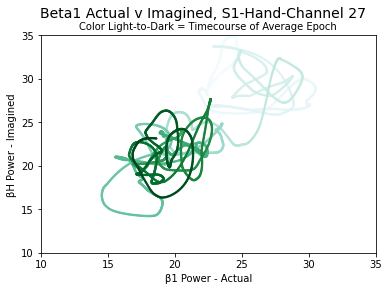

In [6]:
# plot actual versus imagined beta1for S1+Hand+Electrode 27
# by timecourse
bluegreen = plt.cm.get_cmap('BuGn', 256)
z = bluegreen(np.linspace(0,1,4001))

fig, ax = plt.subplots()
ax.set_xlim(10, 35)
ax.set_ylim(10, 35)
ax.scatter(s1_hand27_beta1_overt, s1_hand27_beta1_imag, c=z, s=2)

fig.suptitle("Beta1 Actual v Imagined, S1-Hand-Channel 27", fontsize=14)
ax.set_title("Color Light-to-Dark = Timecourse of Average Epoch", fontsize=10, loc='center')
ax.set_xlabel(str(chr(946)+'1 Power - Actual'))
ax.set_ylabel(str(chr(946)+'H Power - Imagined'))

plt.show()
fig.savefig("Beta_ActualvImagined_S1Hand27_Timecourse.png")

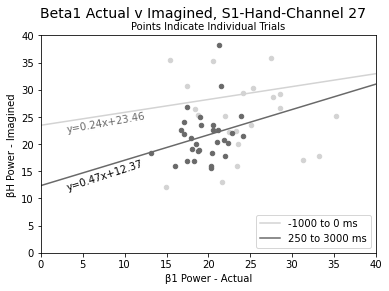

In [7]:
# plot actual versus imagined beta1for S1+Hand+Electrode 27
# by trial (pre-movement and post-movement)

xpre = s1_hand27_beta1_overt_powerpre
ypre = s1_hand27_beta1_imag_powerpre
xpost = s1_hand27_beta1_overt_powerpost
ypost = s1_hand27_beta1_imag_powerpost

xseq = np.linspace(0,40,400)

bpre, apre = np.polyfit(xpre, ypre, deg=1)
bpost, apost = np.polyfit(xpost, ypost, deg=1)

fig, ax = plt.subplots()
ax.set_xlim(0, 40)
ax.set_ylim(0, 40)
ax.scatter(xpre, ypre, c='lightgrey', s=20)
ax.scatter(xpost, ypost, c='dimgrey', s=20)
ax.plot(xseq, apre+bpre*xseq, color="lightgrey", lw=1.5, label='-1000 to 0 ms')
postline = ax.plot(xseq, apost+bpost*xseq, color="dimgrey", lw=1.5, label='250 to 3000 ms')

fig.suptitle("Beta1 Actual v Imagined, S1-Hand-Channel 27", fontsize=14)
ax.set_title("Points Indicate Individual Trials", fontsize=10, loc='center')
ax.set_xlabel(str(chr(946)+'1 Power - Actual'))
ax.set_ylabel(str(chr(946)+'H Power - Imagined'))

tpre = ax.text(
    3, 24, "y=0.24x+23.46", ha="left", va="center", rotation=10, size=10, c='dimgrey')
tpost = ax.text(
    3, 14.3, "y=0.47x+12.37", ha="left", va="center", rotation=18, size=10, c='black')

ax.legend(loc='lower right')

plt.show()
fig.savefig("Beta_ActualvImagined_S1Hand27_TrialPreAndPost.png")